In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,Weather condition,Priority Code (Inversely propo.),Score,Priority score(directly pro.),Random distance (0 to 50km),Combined Score
0,Moderate or heavy rain with thunder,1276,1.085669,0.921091,25.721522,0.035810
1,Heavy freezing drizzle,1171,0.996331,1.003683,27.073236,0.037073
2,Mist,1030,0.876363,1.141080,45.093962,0.025304
3,Light sleet,1204,1.024408,0.976173,12.570120,0.077658
4,Overcast,1009,0.858495,1.164829,28.352466,0.041084


In [3]:
x=df.iloc[:,3:5]
y=df.iloc[:,-1]

print(x)


      Priority score(directly pro.)  Random distance (0 to 50km)
0                          0.921091                    25.721522
1                          1.003683                    27.073236
2                          1.141080                    45.093962
3                          0.976173                    12.570120
4                          1.164829                    28.352466
...                             ...                          ...
4795                       0.993502                    30.019257
4796                       1.024684                     6.236146
4797                       1.168303                     3.357702
4798                       0.945545                    46.961410
4799                       1.141080                     7.818488

[4800 rows x 2 columns]


In [4]:
print(y)

0       0.035810
1       0.037073
2       0.025304
3       0.077658
4       0.041084
          ...   
4795    0.033095
4796    0.164314
4797    0.347947
4798    0.020135
4799    0.145946
Name: Combined Score, Length: 4800, dtype: float64


In [47]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [48]:
x_train

,Priority score(directly pro.),Random distance (0 to 50km)
3813,0.941003,21.380453
2354,1.081244,10.572372
2629,0.996028,10.261492
2117,0.934271,29.176108
3139,0.996028,43.696991
...,...,...
4426,1.099450,23.808916
466,0.968930,33.512938
3092,1.099450,34.994161
3772,0.929836,8.270582


In [49]:
y_train

3813    0.044012
2354    0.102271
2629    0.097065
2117    0.032022
3139    0.022794
          ...   
4426    0.046178
466     0.028912
3092    0.031418
3772    0.112427
860     0.084183
Name: Combined Score, Length: 3360, dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [51]:
regression

LinearRegression()

In [52]:
#Training
regression.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred = regression.predict(x_test)

In [62]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.03268095192266196

In [63]:
mean_squared_error(y_test, y_pred)

1.998871815198878

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [56]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [57]:
y_pred_dt = regressor.predict(x_test)

In [58]:
r2_score(y_test,regressor.predict(x_test))


0.9849118500329904

[Text(0.08687548726611227, 0.9583333333333334, 'X[1] <= 0.051\nsquared_error = 2.618\nsamples = 3360\nvalue = 0.197'),
 Text(0.004158004158004158, 0.875, 'X[0] <= 1.023\nsquared_error = 229.982\nsamples = 3\nvalue = 44.836'),
 Text(0.002079002079002079, 0.7916666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 65.164'),
 Text(0.006237006237006237, 0.7916666666666666, 'X[0] <= 1.119\nsquared_error = 35.049\nsamples = 2\nvalue = 34.672'),
 Text(0.004158004158004158, 0.7083333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 40.592'),
 Text(0.008316008316008316, 0.7083333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 28.752'),
 Text(0.1695929703742204, 0.875, 'X[1] <= 0.198\nsquared_error = 0.632\nsamples = 3357\nvalue = 0.157'),
 Text(0.02182952182952183, 0.7916666666666666, 'X[1] <= 0.097\nsquared_error = 18.461\nsamples = 16\nvalue = 10.025'),
 Text(0.012474012474012475, 0.7083333333333334, 'X[1] <= 0.07\nsquared_error = 5.682\nsamples = 6\nvalue = 14.994'),
 Text(0.008

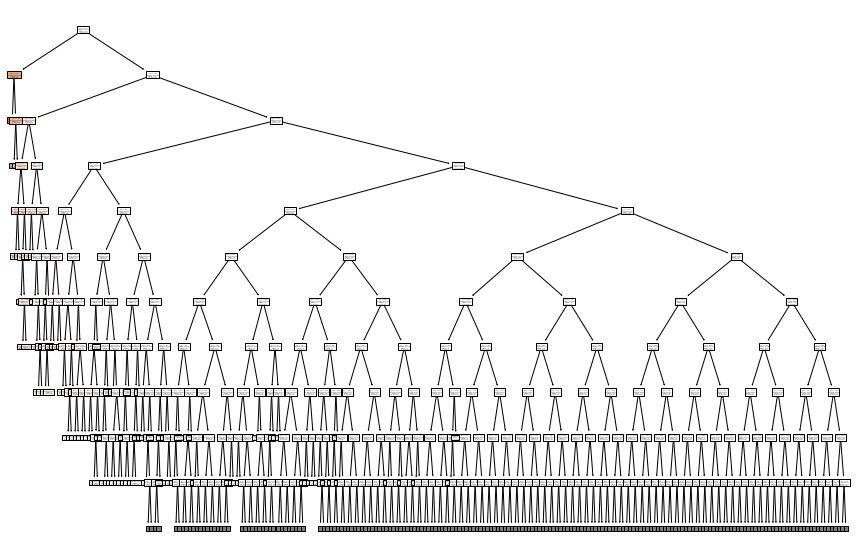

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(regressor,filled='true',max_depth=10)

In [64]:
mean_squared_error(y_test, y_pred_dt)

0.031178211338331898

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [66]:
rf_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [67]:
y_pred_rf = rf_regressor.predict(x_test)

In [68]:
r2_score(y_test,y_pred_rf)

0.9883013114495829

In [69]:
mean_squared_error(y_test, y_pred_rf)

0.02417421518236154